# This notebook has been developed by Cyril Bastin and used for coursera capstone project offered by IBM

# Part 1

## Web Scrapping the postal codes of Canada from Wikipedia using FourSquare

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
print(r.status_code)

200


In [3]:
soup = BeautifulSoup(r.content, 'html.parser')
results = soup.find('table',class_="wikitable sortable")

In [4]:
df = pd.read_html(str(results))[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
df.shape

(180, 3)

### The not assigned rows are removed

In [6]:
df_data=df[df.Borough != 'Not assigned']
df_data.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
if (df_data['Neighbourhood'].values.tolist() == 'Not assigned'):
       df_data.loc['Neighbourhood'].values = df_data.loc['Borough'].values
df_data.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
df_data.shape

(103, 3)

# Part 2

In [9]:
dfcoord = pd.read_csv("http://cocl.us/Geospatial_data")
dfcoord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## The latitude and longitude data has been merged under a single data table

In [10]:
df_data = dfcoord.join(df_data.set_index('Postal Code'), on='Postal Code')
df_data.head()

,Postal Code,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [11]:
df_data['Neighbourhood'] = df_data['Neighbourhood'].astype(str)
r = df_data.groupby(by=['Postal Code'], sort=False).agg( ','.join)

#### As the M5A postal address have already rectified in the wikipedia page, the result thrown are same when grouped to a single column.

In [12]:
df_data.shape

(103, 5)

In [13]:
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium
import json

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim



Your credentails:
CLIENT_ID: 14IR40MG0QKC0PXFTPMRNN4EINLVNMPDDBSAVNEA4L41CK0J
CLIENT_SECRET:GEDJUWE1WKBALSKQ4MSGBUEL0IQFWKEO2QLAYW25F0FLRXNJ


## Using FourSquare agent the latitude and longitude values are obtained

In [15]:
address = 'Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


## The generated map is developed based on the latitude and longitude by popping the address before clustering

In [16]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data['Latitude'], df_data['Longitude'], df_data['Borough'], df_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Part 3

## The Best value of K for K-Means is obtained

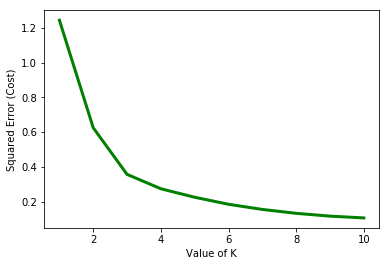

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = df_data[['Latitude','Longitude']]
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show()

## K-Means Clustering

In [20]:
clusterNum = 4
print ("The best possible K value = " + str(clusterNum))
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
df_data["Classifier"] = labels
df_data.head()

The best possible K value = 4


,Postal Code,Latitude,Longitude,Borough,Neighbourhood,Classifier
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge",1
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek",1
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill",1
3,M1G,43.770992,-79.216917,Scarborough,Woburn,1
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae,1


## The generated map is developed based on the latitude and longitude by popping the address after K-Means clustering

In [21]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

map_toronto_cluster = folium.Map(location=[latitude, longitude], zoom_start=10)

xs = np.arange(clusterNum)
ys = [i + xs + (i*xs)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


for lat, lng, neigh, cluster in zip(df_data['Latitude'], df_data['Longitude'], df_data['Neighbourhood'], df_data['Classifier']):
    #label = '{}, {}'.format(neigh, cluster)
    #label = folium.Popup(label, parse_html=True)
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_cluster)  
    
map_toronto_cluster